In [1]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\82108\anaconda3\python.exe -m pip install --upgrade pip' command.


In [116]:
# 필요한 라이브러리 불러오기
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
raw_welfare = pd.read_spss('c:/data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

### 데이터 검토하기 
데이터의 구조와 특징을 파악해보겠습니다.

In [4]:
welfare # 앞부분, 뒷부분 출력 
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량 출력 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


데이터를 보았을 때, 변수의 수가 많고 변수명이 코드로 되어있어 전체 구조를 파악하기 어렵다. 규모가 큰 데이터는 데이터 전체를 한 번에 파악하기보다 변수명을 쉬운 단어로 바꾼 다음 분석에 사용할 변수를 하나씩 살펴봐야 한다.

#### 변수명 바꾸기 
규모가 큰 조사 자료는 데이터의 특징을 설명해 놓은 코드북을 함께 제공한다. 코드북에는 코드로 된 변수명과 값의 의미가 설명되어 있다. 코드북을 보면 데이터의 특징이 어떠한지 감을 잡을 수 있고, 분석에 어떤 변수를 활용할지, 분석 방향의 아이디어를 얻을 수 있다. 

In [6]:
# 코드북을 참고해서 분석에 사용할 변수 7개의 이름을 알아보기 쉬운 단어로 변경합니다.
welfare = welfare.rename(
            columns = {'h14_g3' : 'sex',
                       'h14_g4' : 'birth',
                       'h14_g10': 'marriage_type',
                        'h14_g11' : 'religion',
                       'p1402_8aq1' : 'income',
                       'h14_eco9' : 'code_job',
                       'h14_reg7' : 'code_region'})

#### 데이터 분석 절차 살펴보기 
앞에서 선정한 변수 7개를 이용해서 분석을 진행합니다. 
분석의 절차는 아래와 같습니다:

* 1단계 : 변수 검토 및 전처리
* 2단계 : 변수 간 관계 분석 

### 성별에 따른 월급 차이 -- 성별에 따라 월급이 다를까?

여성들이 예전에 비해 활발하게 사회 진출을 하고 있지만, 직장에서 받는 대우에는 여전히 차별이 있습니다. 데이터를 분석해 성별에 따라 월급 차이가 있는지 알아보겠습니다.먼저 성별과 월급 두 변수를 전처리한 다음 변수 간의 관계를 분석하겠습니다.  

* 1단계 : 변수 검토 및 전처리 
    * 성별
    * 월급
    
* 2단계 : 변수 간 관계 분석 
    * 성별 월급 평균표 만들기
    * 그래프 만들기 

#### 변수 검토하기

In [11]:
welfare['sex'].dtypes #변수 타입 출력 

dtype('float64')

In [12]:
welfare['sex'].value_counts() # 빈도 구하기 

2.0    7913
1.0    6505
Name: sex, dtype: int64

#### 전처리 하기 

* 성별 변수의 값이 1이면 남자, 2면 여자를 의미합니다. 
* 모른다고 답하거나 응답하지 않으면 9로 입력되어 있습니다. 

이 정보를 바탕으로 이상치가 있는지 검토하고, 분석할 때 제거하기 편하도록 NaN을 부여해 결측 처리하겠습니다. 값이 9인 경우도 성별을 알 수 없어 분석에서 제외해야 하므로 결측 처리합니다. 

In [13]:
# 이상치 확인
welfare['sex'].value_counts() ## 이상치가 없음을 확인 

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [14]:
# 만약 이상치가 있다면?

# 이상치 결측 처리 
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
# 결측치 확인
welfare['sex'].isna().sum()

0

In [15]:
# 성별 항목 이름 부여 
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

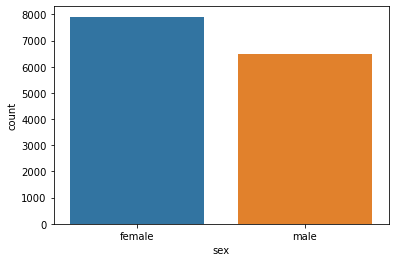

In [17]:
# 빈도 막대 그래프 구하기 
sns.countplot(data = welfare, x = 'sex')

#### 월급 변수 검토 및 전처리하기 

##### 변수 검토하기 
월급은 '일한 달의 월 평균 임금'을 의미하며 1만 원 단위로 기록되어 있습니다.

성별은 범주 변수이므로 df.value_counts()를 이용해 범주별 빈도를 확인하면 특징을 파악할 수 있습니다. 하지만 월급은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어렵습니다. 연속 변수는 df.describe()로 요약 통계량을 확인해야 특징을 파악할 수 있습니다.

In [19]:
welfare['income'].describe() # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

출력 결과를 보면 imcome은 0 ~ 1,892만 원의 값을 지닙니다. 150~345만원에 가장 많이 분포하고 있고 평균은 268만 원, 중앙값은 평균보다 작은 220만원으로 전반적으로 분포가 낮은 값 쪽으로 치우쳐 있습니다. 

이번에는 sns.histplot()으로 히스토그램을 만들어 분포를 확인하겠습니다. 

<AxesSubplot:xlabel='income', ylabel='Count'>

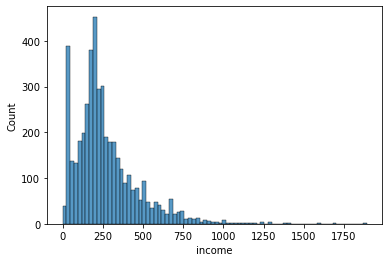

In [21]:
sns.histplot(data = welfare, x = 'income') # 히스토그램

##### 전처리 하기 
코드북을 보면 '모름/무응답'은 9999로 코딩되어 있습니다. 이 정보를 바탕으로 변수를 전처리 하겠습니다. 

In [22]:
welfare['income'].describe() # 이상치 확인 

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [23]:
welfare['income'].isna().sum()

9884

이상치가 9,884개 존재하는 것을 파악했습니다. 직업이 없어서 월급을 받지 않는 응답자가 있기 때문에 데이터에 결측치가 있는 것입니다. 따라서 월급 변수를 이용해 분석할 때는 먼저 결측치를 제거해야 합니다.

In [25]:
# 이상치 결측 처리 
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

#### 성별에 따른 월급 차이 분석하기 

##### 성별 월급 평균표 만들기 

In [34]:
# 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income'])\
            .groupby('sex', as_index = False)\
            .agg(mean_income = ('income','mean'))

sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


출력 결과를 보면 월급 평균이 남자는 약 349만원, 여자는 약 186만원으로 남성이 여성보다 163만원 더 많습니다. 

##### 그래프 만들기 

<AxesSubplot:xlabel='sex', ylabel='mean_income'>

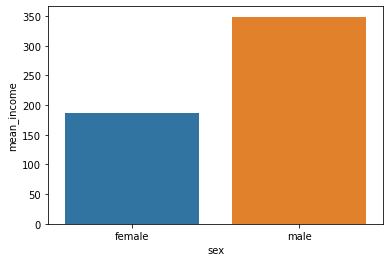

In [36]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

### 나이와 월급의 관계 -- 몇 살 때 월급을 가장 많이 받을까?

데이터를 분석해 나이에 따라 월급이 얼마나 다른지 알아보겠습니다.

나이 변수를 검토하고 전처리한 다음 나이와 월급의 관계를 분석하겠습니다. 월급 변수의 전처리는 앞에서 완료했으니 생략하겠습니다.

* 1단계 : 변수 검토 및 전처리 
    * 나이
    * 월급
    
* 2단계 : 변수 간 관계 분석
    * 나이에 따른 월급 평균표 만들기
    * 그래프 만들기 

#### 나이 변수 검토 및 전처리하기 

##### 변수 검토하기

태어난 연도를 이용해서 나이 변수를 만들어야 합니다. 먼저 태어난 연도 변수를 검토한 다음 나이 변수를 만들겠습니다.

In [37]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<AxesSubplot:xlabel='birth', ylabel='Count'>

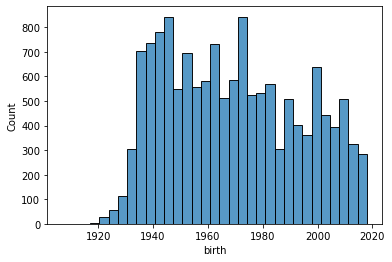

In [38]:
sns.histplot(data = welfare, x = 'birth')

##### 전처리 하기 
'모름/무응답'일 경우 9999로 코딩되어 있습니다. 이를 바탕으로 전처리 작업을 진행합니다.

In [39]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [40]:
welfare['birth'].isna().sum()

0

In [41]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인 
welfare['birth'].isna().sum()

0

##### 파생변수 만들기 - 나이 
2019년에 조사가 진행되었으니 2019에서 태어난 연도를 뺀 다음 1을 더해 나이를 구하겠습니다. 

In [42]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1 ) # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

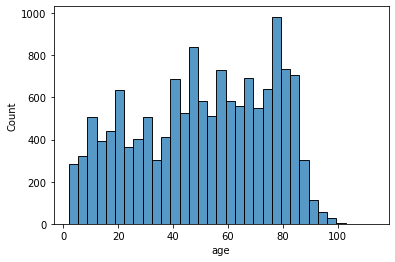

In [43]:
sns.histplot(data = welfare, x = 'age')

##### 나이와 월급 관계 분석하기 

In [45]:
# 나이에 따른 월급 평균표 
age_income = welfare.dropna(subset = ['income'])\
            .groupby('age')\
            .agg(mean_income = ('income','mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

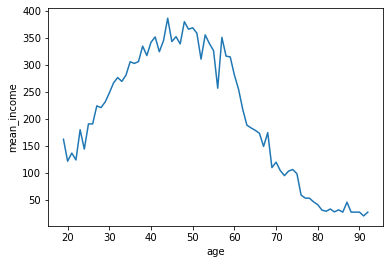

In [46]:
# 그래프 만들기

sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

20대 초반에 월급을 150만원 가량 받고 이후 지속해서 증가하는 추세를 보입니다. 40대에 350만 원가량으로 가장 많이 받고 지속해서 감소하다가 60대에는 20대보다 낮은 월급을 받습니다.

### 연령대에 따른 월급 차이 -- 어떤 연령대의 월급이 가장 많을까? 

#### 연령대 변수 검토 및 전처리하기 

##### 파생변수 만들기 - 연령대 

* 초년층 : 30세 미만
* 중년층 : 30~59세 
* 노년층 : 60세 이상 

In [48]:
# 나이 변수 살펴보기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [49]:
# 연령대 변수 만들기 
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

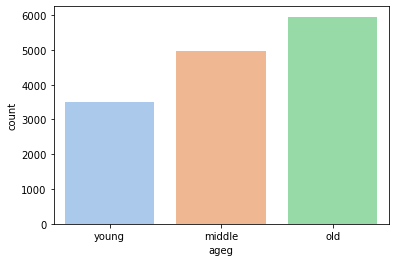

In [79]:
# 빈도 막대 그래프 그리기
sns.countplot(data = welfare, 
            x = 'ageg', 
            palette = sns.color_palette("pastel"),
            order = ['young','middle','old'])

##### 연령대에 따른 월급 차이 분석하기 

In [76]:
# 연령대별 월급 평균표 만들기 
ageg_income = welfare.dropna(subset = ['income'])\
            .groupby('ageg',as_index = False)\
            .agg(mean_income = ('income','mean'))

ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

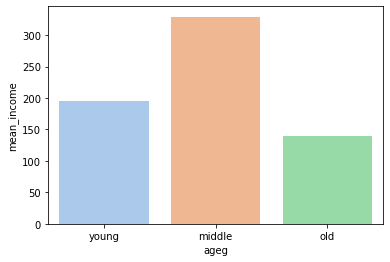

In [78]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, 
            x = 'ageg',
            y = 'mean_income',
            palette = sns.color_palette("pastel"),
            order = ['young','middle','old']
           )

중년층이 330만 원 정도로 가장 많은 월급을 받습니다. 노년층의 월급은 약 140만원으로, 초년층이 받는 195만원 보다 적습니다. 

### 연령대 및 성별 월급 차이 -- 성별 월급 차이는 연령대별로 다를까?

성별 월급 차이는 연령대에 따라 다른 양상을 보일 수 있습니다. 이에 성별 월급 차이가 연령대에 따라 어떻게 다른지 분석해보겠습니다. 

#### 연령대 및 성별 월급 차이 분석하기 

##### 연령대 및 성별 월급 평균표 만들기 

In [80]:
# 연령대 및 성별 평균표 만들기
sex_income =\
            welfare.dropna(subset = ['income'])\
            .groupby(['ageg','sex'], as_index = False)\
            .agg(mean_income = ('income','mean'))

sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

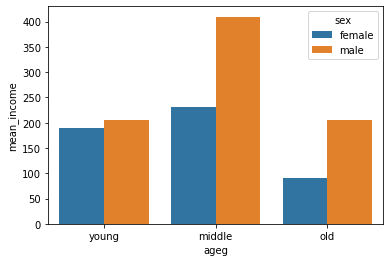

In [81]:
# 그래프 만들기
## hue : 막대 색깔이 성별에 따라 다르도록 그룹 차트 만들기 
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income',
            hue = 'sex', order = ['young','middle','old'])

초년에는 성별에 따른 월급 차이가 크지 않다가 중년에 크게 벌어져 179만원 가량 더 많습니다. 노년에는 차이가 줄어들지만 여전히 남성이 114만 원가량 많습니다.

앞 절에서 연령대별 월급을 분석할 때 노년층이 초년층보다 월급을 적게 받는 것으로 나타났습니다. 그런데 연령대와 성별로 나눈 이번 분석 결과를 보면 노년층이 초년층보다 월급을 적게 받는 현상은 여성에게만 나타납니다. 남성은 노년층과 초년층의 월급이 비슷합니다. 또한 중년층이 초년층보다 월급을 더 많이 받는 현상도 남성에게서 나타나고, 여성은 차이가 크지 않습니다.

##### 나이 및 성별 월급 차이 분석하기

In [82]:
sex_age = welfare.dropna(subset = ['income'])\
                .groupby(['age','sex'], as_index = False)\
                .agg(mean_income = ('income','mean'))

sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

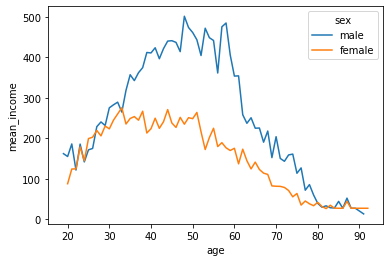

In [83]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

출력된 그래프를 보면 남성의 월급은 50세 전후까지 증가하다가 급격하게 감소하는 반면, 여성은 30대 초반까지 약간 증가하다가 이후로는 완만하게 감소합니다. 성별 월급 격차는 30대 중반부터 벌어지다가 50대에 가장 크게 벌어지고, 이후로 점점 줄어들어 80세가 되면 비슷한 수준이 됩니다. 

### 직업별 월급 차이 -- 어떤 직업이 월급을 가장 많이 받을까?

#### 직업 변수 검토 및 전처리하기

##### 변수 검토하기 

In [85]:
welfare['code_job'].value_counts()

611.0     962
941.0     391
521.0     354
312.0     275
873.0     236
         ... 
122.0       2
1009.0      2
423.0       1
872.0       1
861.0       1
Name: code_job, Length: 150, dtype: int64

##### 전처리하기 

In [86]:
list_job = pd.read_excel('c:/data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [87]:
list_job.shape

(156, 2)

In [88]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [89]:
# code_job 결측치 제거하고 code_job,job 출력 
welfare.dropna(subset = ['code_job'])[['code_job','job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


#### 직업별 월급 차이 분석하기 

##### 직업별 월급 평균표 만들기`

In [90]:
job_income = welfare.dropna(subset = ['job','income'])\
            .groupby('job', as_index = False)\
            .agg(mean_income = ('income','mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


##### 그래프 만들기

In [91]:
# 월급이 많은 직업 
# 상위 10위 추출 

top10 = job_income.sort_values('mean_income',ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [92]:
# 맑은 고딕 폰트 설정 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

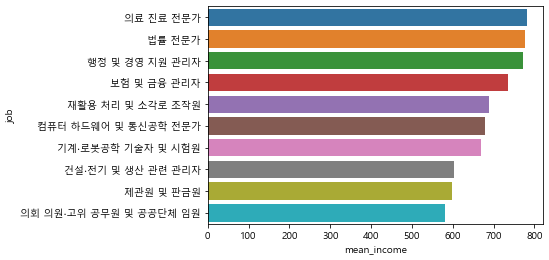

In [93]:
# 막대그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [94]:
# 월급이 적은 직업
# 하위 10위 추출 

bottom10 = job_income.sort_values('mean_income',ascending=True).head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

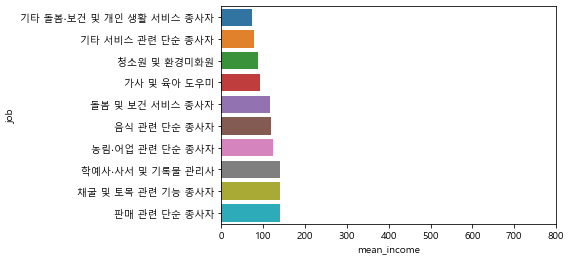

In [97]:
# 막대그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'mean_income')\
    .set(xlim=(0,800))

<AxesSubplot:xlabel='mean_income', ylabel='job'>

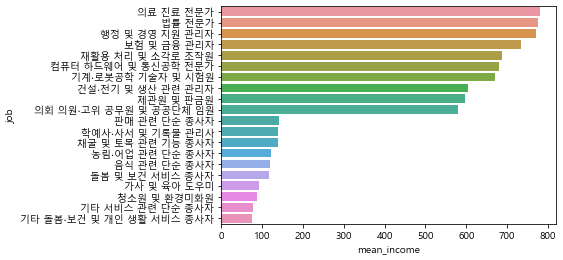

In [101]:
# 합쳐서 함께 봐보기 
x = pd.concat([top10,bottom10]).sort_values('mean_income',ascending=False)

sns.barplot(data = x, x = 'mean_income', y = 'job')

AttributeError: 'AxesSubplot' object has no property 'ax'

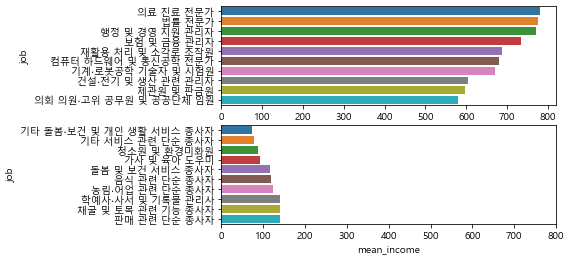

In [117]:
fig, ax = plt.subplots(nrows = 2)
sns.barplot(data = top10, y = 'job', x = 'mean_income', ax = ax[0])
sns.barplot(data = bottom10, y = 'job', x = 'mean_income')\
    .set(xlim=(0,800), ax=ax[1])

### 성별 직업 빈도 -- 성별로 어떤 직업이 가장 많을까?

#### 성별 직업 빈도 분석하기 

##### 성별 직업 빈도표 만들기

In [119]:
# 남성 직업 빈도 상위 10개 추출 
job_male = welfare.dropna(subset = ['job'])\
                    .query('sex == "male"')\
                    .groupby('job',as_index = False)\
                    .agg(n = ('job','count'))\
                    .sort_values('n',ascending=False)\
                    .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [121]:
# 여성 직업 빈도 상위 10개 추출 
job_female = welfare.dropna(subset = ['job'])\
                    .query('sex == "female"')\
                    .groupby('job',as_index=False)\
                    .agg(n = ('job','count'))\
                    .sort_values('n',ascending = False)\
                    .head(10)

job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


##### 그래프 만들기 

앞서 만든 직업 빈도표를 이용해 그래프를 만듭니다. 
두 그래프를 비교하기 위해 x 축의 범위를 0~500으로 통일합니다.

[(0.0, 500.0)]

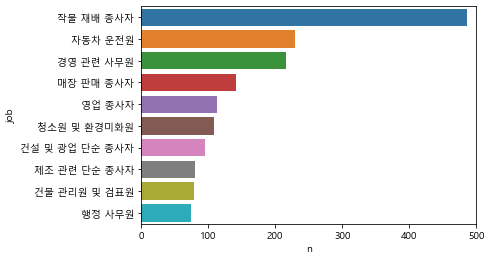

In [122]:
# 남성 직업 빈도 막대
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0,500))

[(0.0, 500.0)]

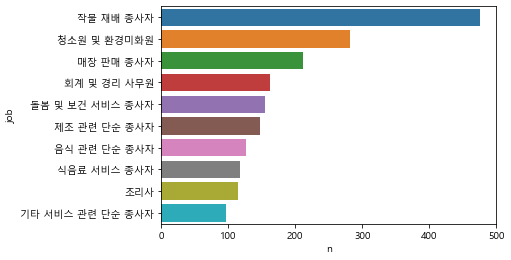

In [123]:
# 여성 직업 빈도 막대
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0,500))

### 종교 유무에 따른 이혼율 -- 종교가 있으면 이혼을 덜 할까?

#### 종교 변수 검토 및 전처리하기 

##### 변수 검토하기 

In [141]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

##### 전처리 
* 1 : 종교 있음
* 2 : 종교 없음 
* 9 : 모름/무응답 

In [142]:
# 종교 유무 이름 부여 
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기 
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

<AxesSubplot:xlabel='religion', ylabel='count'>

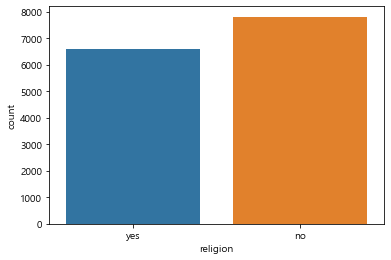

In [143]:
# 막대그래프 만들기
sns.countplot(data = welfare, x = 'religion')

#### 혼인 상태 변수 검톤 및 전처리하기

##### 변수 검토하기 

In [144]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

##### 파생변수 만들기 - 이혼여부 

* 0 : 비해당(18세 미만)
* 1 : 유배우 
* 2 : 사별 
* 3 : 이혼
* 4 : 별거
* 5 : 미혼(18세 이상, 미혼모 포함)
* 6 : 기타(사망 등)

In [145]:
# 이혼 여부 변수 만들기 
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                        np.where(welfare['marriage_type'] == 3, 'divorce',
                                                                'etc'))

In [146]:
# 이혼 여부별 빈도 
n_divorce = welfare.groupby('marriage', as_index = False)\
                    .agg(n=('marriage','count'))

n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<AxesSubplot:xlabel='marriage', ylabel='n'>

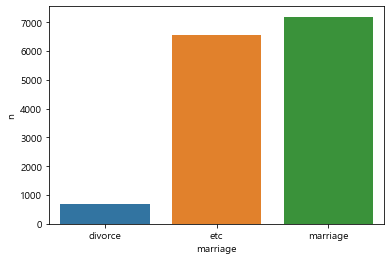

In [147]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

어디에도 속하지 않은 'etc'로 분류된 사람이 6,539명입니다. 이들은 분석 대상이 아니기 때문이 이후 작업에서 제외하겠습니다.